<a href="https://colab.research.google.com/github/Ochie123/licence-plate-recognition/blob/main/Licenseplatedetaction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch_snippets
!pip install pytesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 108.2 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26303 sha2

In [ ]:
import torch
import random
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms.functional as F
from torchvision import transforms
import numpy as np
from torchvision.ops import nms
from PIL import Image
import os
import glob
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
from torchvision.ops import nms
import cv2
import torch_snippets as ts
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights


from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 152MB/s]


Epoch 1:
  Average trn_loss: 15.6337
  Average val_loss: 10.8659
Epoch 2:
  Average trn_loss: 13.0000
  Average val_loss: 10.5509
Epoch 3:
  Average trn_loss: 12.0477
  Average val_loss: 10.3930
Epoch 4:
  Average trn_loss: 11.4925
  Average val_loss: 10.2549
Epoch 5:
  Average trn_loss: 11.1529
  Average val_loss: 10.1467


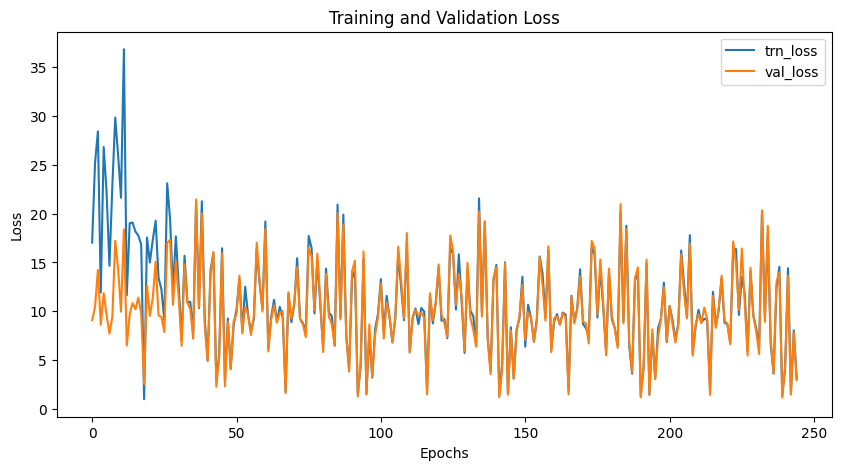

Number of boxes before NMS: 54
Number of boxes after NMS: 3


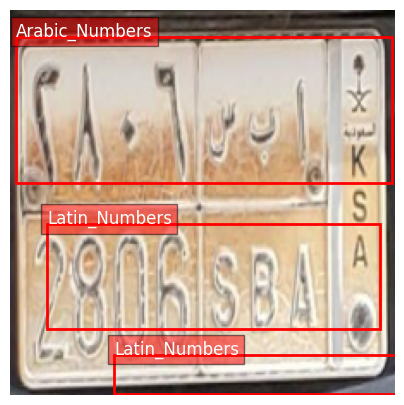

Number of boxes before NMS: 75
Number of boxes after NMS: 6


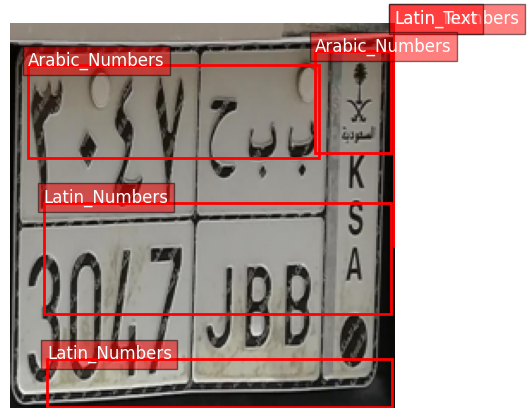

Number of boxes before NMS: 33
Number of boxes after NMS: 3


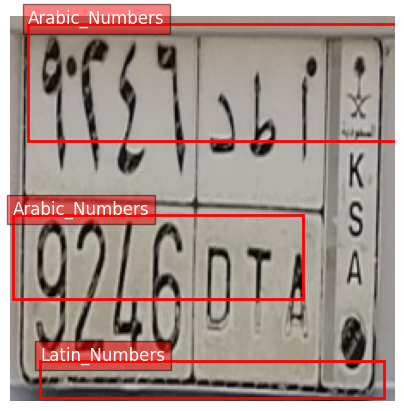

Number of boxes before NMS: 41
Number of boxes after NMS: 3


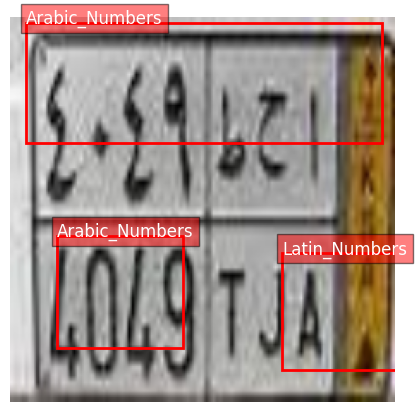

Number of boxes before NMS: 64
Number of boxes after NMS: 3


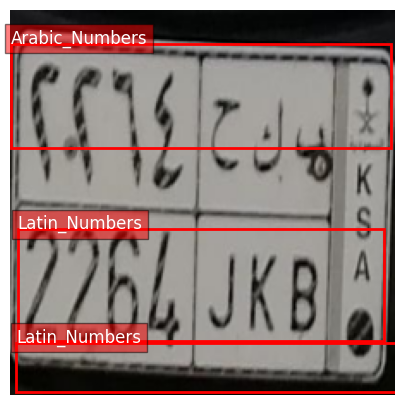

Number of boxes before NMS: 30
Number of boxes after NMS: 2


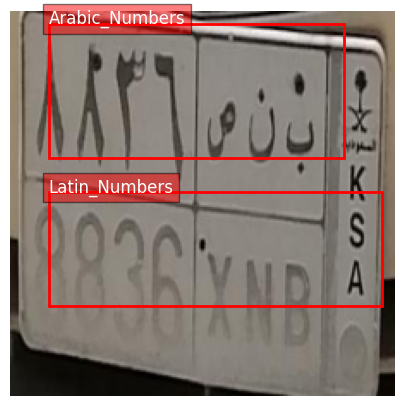

Number of boxes before NMS: 65
Number of boxes after NMS: 3


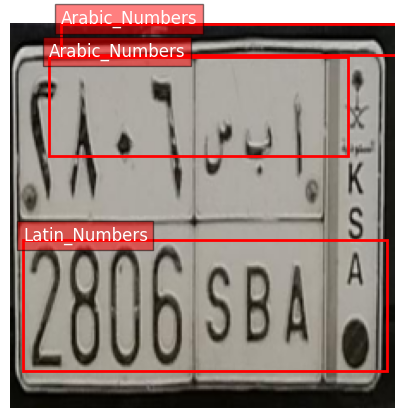

Number of boxes before NMS: 48
Number of boxes after NMS: 3


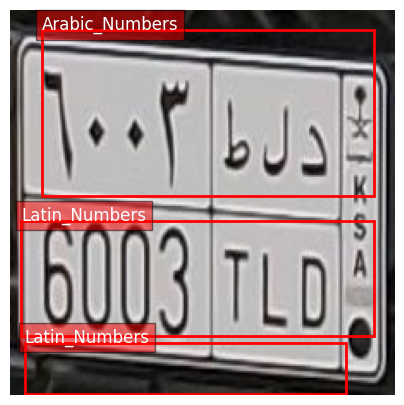

Number of boxes before NMS: 36
Number of boxes after NMS: 4


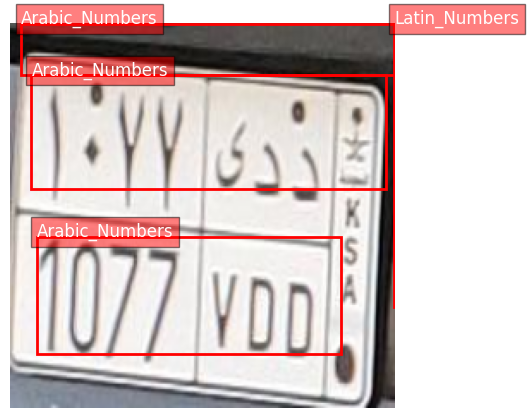

Number of boxes before NMS: 35
Number of boxes after NMS: 2


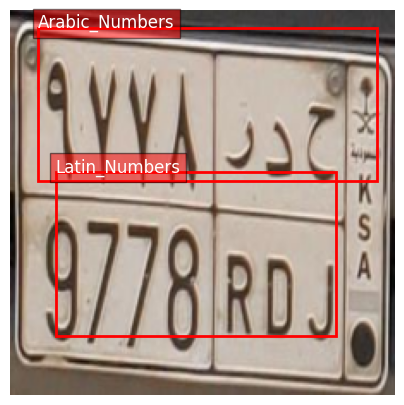

Number of boxes before NMS: 38
Number of boxes after NMS: 3


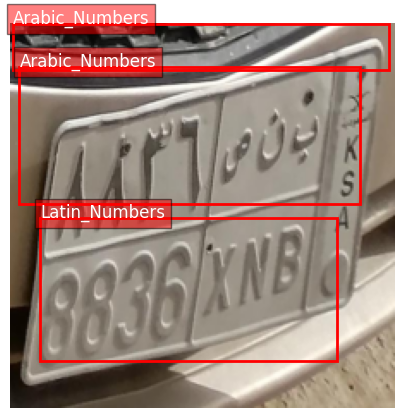

Number of boxes before NMS: 32
Number of boxes after NMS: 3


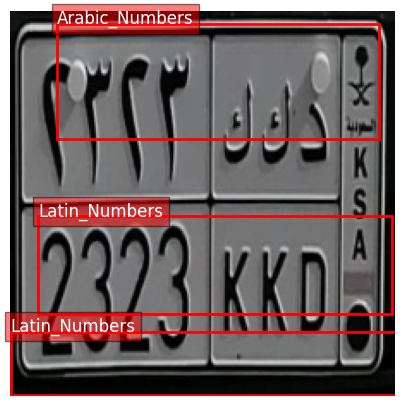

In [ ]:
# -*- coding: utf-8 -*-
# Paths
IMAGE_ROOT = '/content/drive/My Drive/Colab Notebooks/numberplates'
ANNOTATION_ROOT = '/content/drive/My Drive/Colab Notebooks/bboxes_voc'

# Define label mappings
label2target = {
    'Full_Plate': 1,
    'Arabic_Numbers': 2,
    'Latin_Numbers': 3,
    'Arabic_Text': 4,
    'Latin_Text': 5,
    'KSA_Logo': 6,
    'background': 0
}
target2label = {v: k for k, v in label2target.items()}
num_classes = len(label2target)

# Normalize image and convert to tensor
def preprocess_image(img):
    img = torch.tensor(img).permute(2, 0, 1)
    return img.to(device).float()


def parse_voc_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    boxes = []
    labels = []
    for obj in root.findall('object'):
        label = obj.find('name').text
        if label in label2target:
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(label2target[label])
    return boxes, labels

class NumberPlateDataset(Dataset):
    w, h = 224, 224

    def __init__(self, image_dir=IMAGE_ROOT, annotation_dir=ANNOTATION_ROOT):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir

        # Include all relevant file extensions
        self.image_files = []
        for ext in ['*.jpeg', '*.jpg', '*.png']:
            self.image_files.extend(glob.glob(os.path.join(self.image_dir, ext)))

        # Filter images with corresponding XML files
        self.image_files = [
            img for img in self.image_files if os.path.exists(
                os.path.join(self.annotation_dir, os.path.splitext(os.path.basename(img))[0] + '.xml')
            )
        ]

    def __getitem__(self, ix):
        img_path = self.image_files[ix]
        annotation_path = os.path.join(self.annotation_dir, os.path.splitext(os.path.basename(img_path))[0] + '.xml')

        img = Image.open(img_path).convert("RGB")
        img = np.array(img.resize((self.w, self.h), resample=Image.BILINEAR)) / 255.

        boxes, labels = parse_voc_annotation(annotation_path)
        boxes = np.array(boxes, dtype=np.float32)

        # Scale boxes to match resized image
        boxes[:, [0, 2]] *= self.w / img.shape[1]  # Scale width
        boxes[:, [1, 3]] *= self.h / img.shape[0]  # Scale height

        boxes = boxes.tolist()

        target = {}
        target["boxes"] = torch.tensor(boxes, dtype=torch.float32)
        target["labels"] = torch.tensor(labels, dtype=torch.int64)

        img = preprocess_image(img)
        return img, target

    def collate_fn(self, batch):
        return tuple(zip(*batch))

    def __len__(self):
        return len(self.image_files)

# Dataset and DataLoader
train_ids, val_ids = train_test_split(range(len(NumberPlateDataset())), test_size=0.1, random_state=99)
train_ds = NumberPlateDataset()
val_ds = NumberPlateDataset()

train_loader = DataLoader(train_ds, batch_size=4, collate_fn=train_ds.collate_fn, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=4, collate_fn=val_ds.collate_fn, drop_last=True)

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def get_finetuned_model():
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # Freeze the backbone layers
    for param in model.backbone.parameters():
        param.requires_grad = False

    return model


# Defining training and validation functions for a single batch
def train_batch(inputs, model, optimizer):
    model.train()
    input, targets = inputs
    input = list(image.to(device) for image in input)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    optimizer.zero_grad()
    losses = model(input, targets)
    loss = sum(loss for loss in losses.values())
    loss.backward()
    optimizer.step()
    return loss, losses

@torch.no_grad()
def validate_batch(inputs, model):
    model.train()
    input, targets = inputs
    input = list(image.to(device) for image in input)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    losses = model(input, targets)
    loss = sum(loss for loss in losses.values())
    return loss, losses

model = get_finetuned_model().to(device)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.0005)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0005)

class Report:
    def __init__(self, n_epochs):
        self.n_epochs = n_epochs
        self.logs = { 'trn_loss': [], 'val_loss': [] }

    def record(self, epoch, **kwargs):
        for key, value in kwargs.items():
            if key in self.logs:
                self.logs[key].append(value)

    def report_avgs(self, epoch):
        print(f'Epoch {epoch}:')
        for key in self.logs:
            print(f'  Average {key}: {np.mean(self.logs[key]):.4f}')

    def plot_epochs(self, keys):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 5))
        for key in keys:
            plt.plot(self.logs[key], label=key)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()

n_epochs = 5
log = Report(n_epochs)

for epoch in range(n_epochs):
    _n = len(train_loader)
    for ix, inputs in enumerate(train_loader):
        loss, losses = train_batch(inputs, model, optimizer)
        loc_loss, regr_loss, loss_objectness, loss_rpn_box_reg = \
            [losses[k] for k in ['loss_classifier', 'loss_box_reg', 'loss_objectness', 'loss_rpn_box_reg']]
        pos = (epoch + (ix + 1) / _n)
        log.record(pos, trn_loss=loss.item(), trn_loc_loss=loc_loss.item(),
                   trn_regr_loss=regr_loss.item(), trn_objectness_loss=loss_objectness.item(),
                   trn_rpn_box_reg_loss=loss_rpn_box_reg.item(), end='\r')

    _n = len(val_loader)
    for ix, inputs in enumerate(val_loader):
        loss, losses = validate_batch(inputs, model)
        loc_loss, regr_loss, loss_objectness, loss_rpn_box_reg = \
            [losses[k] for k in ['loss_classifier', 'loss_box_reg', 'loss_objectness', 'loss_rpn_box_reg']]
        pos = (epoch + (ix + 1) / _n)
        log.record(pos, val_loss=loss.item(), val_loc_loss=loc_loss.item(),
                   val_regr_loss=regr_loss.item(), val_objectness_loss=loss_objectness.item(),
                   val_rpn_box_reg_loss=loss_rpn_box_reg.item(), end='\r')
    if (epoch + 1) % (n_epochs // 5) == 0: log.report_avgs(epoch + 1)

log.plot_epochs(['trn_loss', 'val_loss'])

from torchvision.ops import nms
def decode_output(output):
    'convert tensors to numpy arrays'
    bbs = output['boxes'].cpu().detach().numpy().astype(np.uint16)
    labels = np.array([target2label[i] for i in output['labels'].cpu().detach().numpy()])
    confs = output['scores'].cpu().detach().numpy()

    print("Number of boxes before NMS:", len(bbs))  # Print number of boxes before NMS

    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    bbs, confs, labels = [tensor[ixs] for tensor in [bbs, confs, labels]]

    print("Number of boxes after NMS:", len(bbs))  # Print number of boxes after NMS

    if len(ixs) == 1:
        bbs, confs, labels = [np.array([tensor]) for tensor in [bbs, confs, labels]]
    return bbs.tolist(), confs.tolist(), labels.tolist()

def show(image, bbs=None, texts=None, sz=5):
    """Display an image with bounding boxes and labels."""
    plt.figure(figsize=(sz, sz))
    plt.imshow(image)
    ax = plt.gca()

    if bbs is not None:
        for box, text in zip(bbs, texts):
            # Create a Rectangle patch
            xmin, ymin, xmax, ymax = box
            width = xmax - xmin
            height = ymax - ymin
            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)
            # Add label text
            ax.text(xmin, ymin, text, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')  # Hide axes
    plt.show()

def preprocess_cropped_image(cropped_image):
    """Preprocess the cropped image for better OCR results."""
    # Convert to grayscale
    gray_image = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2GRAY)
    # Apply thresholding
    _, thresh_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)
    return thresh_image

from torchvision.ops import nms
def decode_output(output):
    'convert tensors to numpy arrays'
    bbs = output['boxes'].cpu().detach().numpy().astype(np.uint16)
    labels = np.array([target2label[i] for i in output['labels'].cpu().detach().numpy()])
    confs = output['scores'].cpu().detach().numpy()

    print("Number of boxes before NMS:", len(bbs))  # Print number of boxes before NMS

    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    bbs, confs, labels = [tensor[ixs] for tensor in [bbs, confs, labels]]

    print("Number of boxes after NMS:", len(bbs))  # Print number of boxes after NMS

    return bbs, confs, labels

model.eval()
for ix, (images, targets) in enumerate(val_loader):
    if ix == 3: break
    images = [im for im in images]
    outputs = model(images)
    for ix, output in enumerate(outputs):
        bbs, confs, labels = decode_output(output)
        info = [f'{l}@{c:.2f}' for l, c in zip(labels, confs)]
        show(images[ix].cpu().permute(1, 2, 0), bbs=bbs, texts=labels, sz=5)


In [ ]:
# -*- coding: utf-8 -*-
# Paths
IMAGE_ROOT = '/content/drive/My Drive/Colab Notebooks/numberplates'
ANNOTATION_ROOT = '/content/drive/My Drive/Colab Notebooks/bboxes_voc'


# Define label mappings
label2target = {
    'Full_Plate': 1,
    'Arabic_Numbers': 2,
    'Latin_Numbers': 3,
    'Arabic_Text': 4,
    'Latin_Text': 5,
    'KSA_Logo': 6,
    'background': 0
}
target2label = {v: k for k, v in label2target.items()}
num_classes = len(label2target)

# Normalize image and convert to tensor
def preprocess_image(img):
    img = torch.tensor(img).permute(2, 0, 1)
    return img.to(device).float()

def parse_voc_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    boxes = []
    labels = []
    for obj in root.findall('object'):
        label = obj.find('name').text
        if label in label2target:
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(label2target[label])
    return boxes, labels

class NumberPlateDataset(Dataset):
    w, h = 224, 224

    def __init__(self, image_dir=IMAGE_ROOT, annotation_dir=ANNOTATION_ROOT, transforms=None):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.transforms = transforms

        # Include all relevant file extensions
        self.image_files = []
        for ext in ['*.jpeg', '*.jpg', '*.png']:
            self.image_files.extend(glob.glob(os.path.join(self.image_dir, ext)))

        # Filter images with corresponding XML files
        self.image_files = [
            img for img in self.image_files if os.path.exists(
                os.path.join(self.annotation_dir, os.path.splitext(os.path.basename(img))[0] + '.xml')
            )
        ]

    def __getitem__(self, ix):
        img_path = self.image_files[ix]
        annotation_path = os.path.join(self.annotation_dir, os.path.splitext(os.path.basename(img_path))[0] + '.xml')

        img = Image.open(img_path).convert("RGB")
        img = img.resize((self.w, self.h), resample=Image.BILINEAR)

        boxes, labels = parse_voc_annotation(annotation_path)
        boxes = np.array(boxes, dtype=np.float32)

        # Scale boxes to match resized image
        boxes[:, [0, 2]] *= self.w / img.size[0]  # Scale width
        boxes[:, [1, 3]] *= self.h / img.size[1]  # Scale height

        boxes = boxes.tolist()

        target = {}
        target["boxes"] = torch.tensor(boxes, dtype=torch.float32)
        target["labels"] = torch.tensor(labels, dtype=torch.int64)

        if self.transforms:
            img, target = self.transforms(img, target)
        else:
            img = transforms.ToTensor()(img)

        img = img.to(device)
        target = {k: v.to(device) for k, v in target.items()}

        return img, target

    def collate_fn(self, batch):
        return tuple(zip(*batch))

    def __len__(self):
        return len(self.image_files)

class ToTensor:
    def __call__(self, image, target):
        image = transforms.functional.to_tensor(image)
        return image, target

class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

class RandomHorizontalFlip:
    def __init__(self, prob):
        self.prob = prob

    def __call__(self, image, target):
        if random.random() < self.prob:
            height, width = image.shape[-2:]
            image = image.flip(-1)
            bbox = target["boxes"]
            bbox[:, [0, 2]] = width - bbox[:, [2, 0]]
            target["boxes"] = bbox
        return image, target

class ColorJitter:
    def __init__(self, brightness=0, contrast=0, saturation=0, hue=0):
        self.color_jitter = transforms.ColorJitter(brightness, contrast, saturation, hue)

    def __call__(self, image, target):
        image = self.color_jitter(image)
        return image, target

def get_transform(train):
    transforms_list = []
    transforms_list.append(ToTensor())
    if train:
        transforms_list.append(RandomHorizontalFlip(0.5))
        transforms_list.append(ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1))
    return Compose(transforms_list)



# Dataset and DataLoader
train_ids, val_ids = train_test_split(range(len(NumberPlateDataset())), test_size=0.1, random_state=99)
train_ds = NumberPlateDataset(transforms=get_transform(train=True))
val_ds = NumberPlateDataset(transforms=get_transform(train=False))

train_loader = DataLoader(train_ds, batch_size=4, collate_fn=train_ds.collate_fn, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=4, collate_fn=val_ds.collate_fn, drop_last=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def get_finetuned_model():
    weights = FasterRCNN_ResNet50_FPN_Weights.COCO_V1
    model = fasterrcnn_resnet50_fpn(weights=weights)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # Freeze the backbone layers
    for param in model.backbone.parameters():
        param.requires_grad = False

    return model

# Defining training and validation functions for a single batch
def train_batch(inputs, model, optimizer):
    model.train()
    input, targets = inputs
    input = list(image.to(device) for image in input)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    optimizer.zero_grad()
    losses = model(input, targets)
    loss = sum(loss for loss in losses.values())
    loss.backward()
    optimizer.step()
    return loss, losses

@torch.no_grad()
def validate_batch(inputs, model):
    model.train()
    input, targets = inputs
    input = list(image.to(device) for image in input)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    losses = model(input, targets)
    loss = sum(loss for loss in losses.values())
    return loss, losses

model = get_finetuned_model().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.0005)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0005)

class Report:
    def __init__(self, n_epochs):
        self.n_epochs = n_epochs
        self.logs = { 'trn_loss': [], 'val_loss': [] }

    def record(self, epoch, **kwargs):
        for key, value in kwargs.items():
            if key in self.logs:
                self.logs[key].append(value)

    def report_avgs(self, epoch):
        print(f'Epoch {epoch}:')
        for key in self.logs:
            print(f'  Average {key}: {np.mean(self.logs[key]):.4f}')

    def plot_epochs(self, keys):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 5))
        for key in keys:
            plt.plot(self.logs[key], label=key)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()

n_epochs = 10
log = Report(n_epochs)

for epoch in range(n_epochs):
    _n = len(train_loader)
    for ix, inputs in enumerate(train_loader):
        loss, losses = train_batch(inputs, model, optimizer)
        loc_loss, regr_loss, loss_objectness, loss_rpn_box_reg = \
            [losses[k] for k in ['loss_classifier', 'loss_box_reg', 'loss_objectness', 'loss_rpn_box_reg']]
        pos = (epoch + (ix + 1) / _n)
        log.record(pos, trn_loss=loss.item(), trn_loc_loss=loc_loss.item(),
                   trn_regr_loss=regr_loss.item(), trn_objectness_loss=loss_objectness.item(),
                   trn_rpn_box_reg_loss=loss_rpn_box_reg.item(), end='\r')

    _n = len(val_loader)
    for ix, inputs in enumerate(val_loader):
        loss, losses = validate_batch(inputs, model)
        loc_loss, regr_loss, loss_objectness, loss_rpn_box_reg = \
            [losses[k] for k in ['loss_classifier', 'loss_box_reg', 'loss_objectness', 'loss_rpn_box_reg']]
        pos = (epoch + (ix + 1) / _n)
        log.record(pos, val_loss=loss.item(), val_loc_loss=loc_loss.item(),
                   val_regr_loss=regr_loss.item(), val_objectness_loss=loss_objectness.item(),
                   val_rpn_box_reg_loss=loss_rpn_box_reg.item(), end='\r')
    if (epoch + 1) % (n_epochs // 5) == 0: log.report_avgs(epoch + 1)

log.plot_epochs(['trn_loss', 'val_loss'])





Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:03<00:00, 50.3MB/s]


KeyboardInterrupt: 

In [ ]:
def show(image, bbs=None, texts=None, sz=5):
    """Display an image with bounding boxes and labels."""
    plt.figure(figsize=(sz, sz))
    plt.imshow(image)
    ax = plt.gca()

    if bbs is not None:
        for box, text in zip(bbs, texts):
            # Create a Rectangle patch
            xmin, ymin, xmax, ymax = box
            width = xmax - xmin
            height = ymax - ymin
            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)
            # Add label text
            ax.text(xmin, ymin, text, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')  # Hide axes
    plt.show()

def preprocess_cropped_image(cropped_image):
    """Preprocess the cropped image for better OCR results."""
    # Convert to grayscale
    gray_image = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2GRAY)
    # Apply thresholding
    _, thresh_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)
    return thresh_image

from torchvision.ops import nms
def decode_output(output):
    'convert tensors to numpy arrays'
    bbs = output['boxes'].cpu().detach().numpy().astype(np.uint16)
    labels = np.array([target2label[i] for i in output['labels'].cpu().detach().numpy()])
    confs = output['scores'].cpu().detach().numpy()

    print("Number of boxes before NMS:", len(bbs))  # Print number of boxes before NMS

    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    bbs, confs, labels = [tensor[ixs] for tensor in [bbs, confs, labels]]

    print("Number of boxes after NMS:", len(bbs))  # Print number of boxes after NMS

    return bbs, confs, labels

# Evaluate the model and perform OCR on detected regions
model.eval()
for ix, (images, targets) in enumerate(val_loader):
    if ix == 3: break
    images = [im for im in images]
    outputs = model(images)
    for ix, output in enumerate(outputs):
        bbs, confs, labels = decode_output(output)
        info = [f'{l}@{c:.2f}' for l, c in zip(labels, confs)]
        show(images[ix].cpu().permute(1, 2, 0), bbs=bbs, texts=info, sz=5)

        # OCR for each detected region
        image_np = images[ix].cpu().permute(1, 2, 0).numpy()
        for bb, label in zip(bbs, labels):
            xmin, ymin, xmax, ymax = bb
            cropped_image = Image.fromarray(image_np[ymin:ymax, xmin:xmax].astype(np.uint8))
            # Preprocess the cropped image
            processed_image = preprocess_cropped_image(cropped_image)
            # Use Pytesseract to extract text
            text = pytesseract.image_to_string(processed_image, config='--psm 6')
            if text.strip():  # Only print if text is detected
                print(f"Detected {label}: {text.strip()}")
            else:
                print(f"Detected {label}: No text found")

In [ ]:
import torch
from torchvision import transforms
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
import io

# Assume all your model definitions, dataset classes, etc. are here

def process_single_image(image, model, device):
    # Preprocess the image
    image_tensor = transforms.ToTensor()(image).unsqueeze(0).to(device)

    # Run inference
    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)

    # Decode the output
    bbs, confs, labels = decode_output(outputs[0])

    # Draw bounding boxes and labels on the image
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for bb, label, conf in zip(bbs, labels, confs):
        xmin, ymin, xmax, ymax = bb
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)
        draw.text((xmin, ymin - 10), f"{label}: {conf:.2f}", fill="red", font=font)

    return image

def annotate_number_plate(file_content):
    try:
        # Convert file content to image
        image = Image.open(io.BytesIO(file_content)).convert("RGB")

        # Load the trained model
        model = get_finetuned_model().to(device)
        #/kaggle/input/adamsoptimizer/pytorch/default/1/model_checkpoint_epoch_20.pth
        model.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/final_number_plate_model.pth', weights_only=True))
        model.eval()

        # Display original image
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis('off')

        # Process and display annotated image
        annotated_image = process_single_image(image, model, device)
        plt.subplot(1, 2, 2)
        plt.imshow(annotated_image)
        plt.title("Annotated Image")
        plt.axis('off')

        plt.show()
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please make sure the model file exists and the image format is supported.")

# Create a file upload widget
upload = widgets.FileUpload(accept='image/*', multiple=False)
output = widgets.Output()

def on_upload_change(change):
    with output:
        output.clear_output()
        if change['type'] == 'change' and change['name'] == 'value':
            file_info = next(iter(change['new'].values()))  # Extract file information
            file_content = file_info['content']  # Extract the actual file content
            annotate_number_plate(file_content)

upload.observe(on_upload_change, names='value')

# Display the widgets
display(upload, output)



FileUpload(value={}, accept='image/*', description='Upload')

Output()